In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [191]:
Caravan = pd.read_csv("/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Caravan.csv", index_col = 'Unnamed: 0')

In [192]:
Caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [193]:
Caravan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 1 to 5822
Data columns (total 86 columns):
MOSTYPE     5822 non-null int64
MAANTHUI    5822 non-null int64
MGEMOMV     5822 non-null int64
MGEMLEEF    5822 non-null int64
MOSHOOFD    5822 non-null int64
MGODRK      5822 non-null int64
MGODPR      5822 non-null int64
MGODOV      5822 non-null int64
MGODGE      5822 non-null int64
MRELGE      5822 non-null int64
MRELSA      5822 non-null int64
MRELOV      5822 non-null int64
MFALLEEN    5822 non-null int64
MFGEKIND    5822 non-null int64
MFWEKIND    5822 non-null int64
MOPLHOOG    5822 non-null int64
MOPLMIDD    5822 non-null int64
MOPLLAAG    5822 non-null int64
MBERHOOG    5822 non-null int64
MBERZELF    5822 non-null int64
MBERBOER    5822 non-null int64
MBERMIDD    5822 non-null int64
MBERARBG    5822 non-null int64
MBERARBO    5822 non-null int64
MSKA        5822 non-null int64
MSKB1       5822 non-null int64
MSKB2       5822 non-null int64
MSKC        5822 non-null int

In [194]:
Caravan['Purchase'].value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [195]:
perc_yes = 348/5822
print("%% of Yes's: %f " % perc_yes)

% of Yes's: 0.059773 


In [196]:
from sklearn.preprocessing import StandardScaler

In [198]:
scaler = StandardScaler()
scaler.fit(Caravan.drop(columns='Purchase', axis = 1).astype(float))
scaled_features = scaler.transform(Caravan.drop(columns='Purchase', axis = 1).astype(float))

In [199]:
df = pd.DataFrame(scaled_features, columns=Caravan.columns[:-1])

In [200]:
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,0.680906,-0.27258,0.406697,-1.216964,0.779405,-0.694311,0.217444,-0.068711,-0.161816,0.427670,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
1,0.992297,-0.27258,-0.859500,-1.216964,0.779405,0.302552,-0.365410,-0.068711,0.464159,-0.096077,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
2,0.992297,-0.27258,-0.859500,-1.216964,0.779405,-0.694311,-0.365410,0.914172,0.464159,-1.667319,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
3,-1.187437,-0.27258,0.406697,0.010755,-0.970980,1.299414,-0.948264,0.914172,0.464159,-0.619824,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
4,1.225840,-0.27258,1.672893,-1.216964,1.479559,0.302552,-0.365410,-0.068711,0.464159,0.427670,...,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816


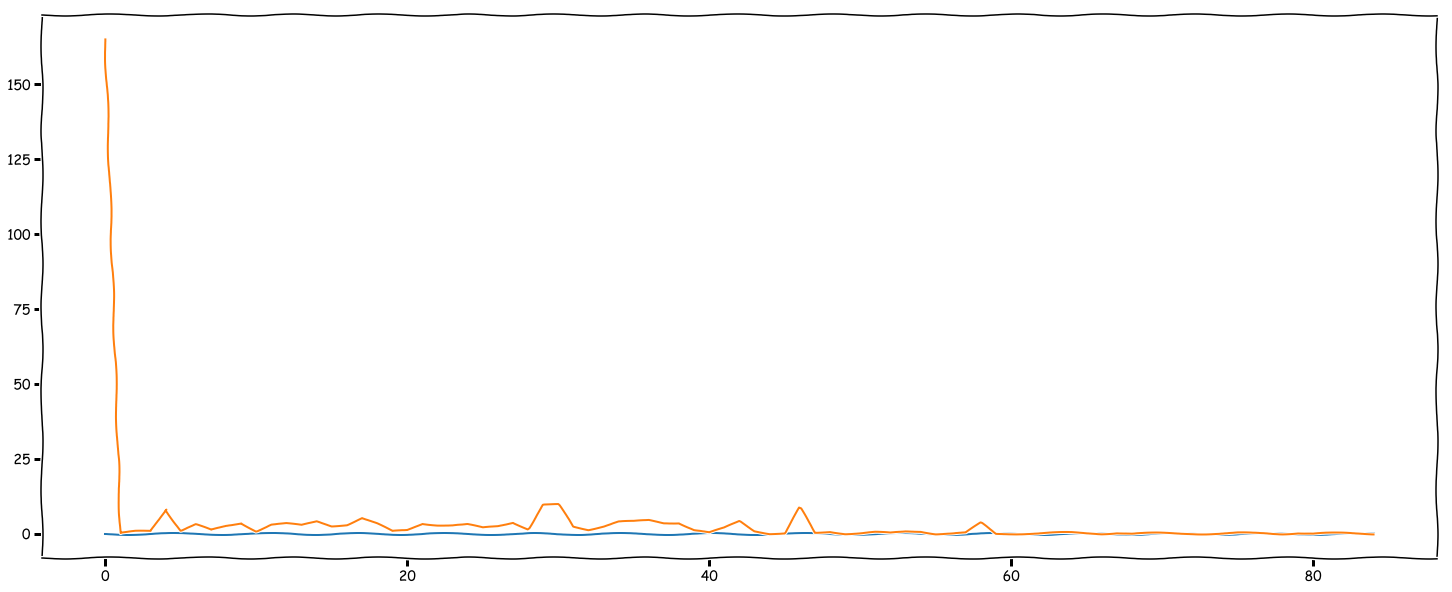

In [201]:
pf = pd.DataFrame()
for i in Caravan.columns[:-1]:
    pf = pf.append([Caravan[i].var()])


plt.xkcd()
plt.figure(figsize = (25, 10))
plt.plot(pf.reset_index())

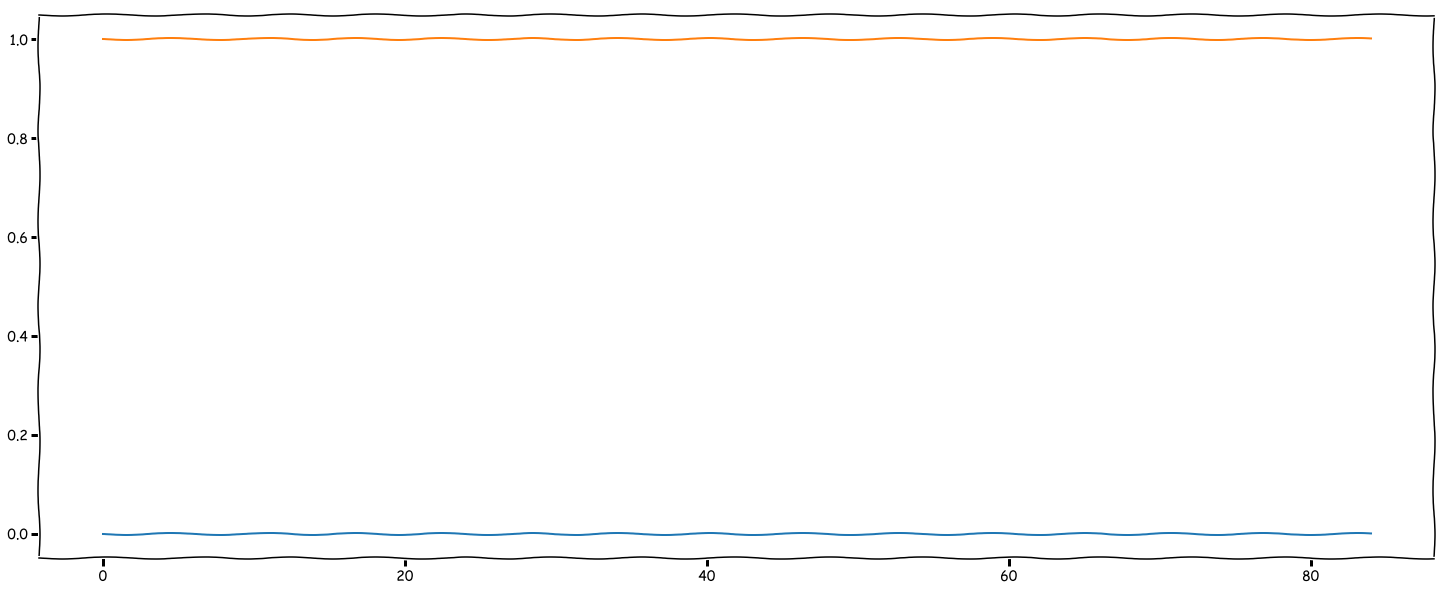

In [202]:
pf2 = pd.DataFrame()
for i in df.columns:
    pf2 = pf2.append([df[i].var()])


plt.xkcd()
plt.figure(figsize = (25, 10))
plt.plot(pf2.reset_index())

**As we can see, the variance is "standardised" at ~1.**

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, Caravan.Purchase, test_size=0.171, random_state=42)

In [205]:
from sklearn.neighbors import KNeighborsClassifier

In [206]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

In [207]:
knn_pred = knn.predict(X_test)

In [208]:
from sklearn.metrics import confusion_matrix, classification_report

In [209]:
print(confusion_matrix(y_test, knn_pred))

[[863  66]
 [ 58   9]]


In [210]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

          No       0.94      0.93      0.93       929
         Yes       0.12      0.13      0.13        67

   micro avg       0.88      0.88      0.88       996
   macro avg       0.53      0.53      0.53       996
weighted avg       0.88      0.88      0.88       996



In [211]:
knn3 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [212]:
knn3 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [213]:
knn3 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [214]:
knn3 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [215]:
knn5 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [216]:
knn5_pred = knn5.predict(X_test)

In [217]:
print(confusion_matrix(y_test, knn5_pred))

[[921   8]
 [ 65   2]]


In [218]:
print(classification_report(y_test, knn5_pred))

              precision    recall  f1-score   support

          No       0.93      0.99      0.96       929
         Yes       0.20      0.03      0.05        67

   micro avg       0.93      0.93      0.93       996
   macro avg       0.57      0.51      0.51       996
weighted avg       0.88      0.93      0.90       996



In [219]:
knn7 = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

In [220]:
knn7_pred = knn7.predict(X_test)

In [221]:
print(confusion_matrix(y_test, knn7_pred))

[[928   1]
 [ 66   1]]


In [222]:
print(classification_report(y_test, knn7_pred))

              precision    recall  f1-score   support

          No       0.93      1.00      0.97       929
         Yes       0.50      0.01      0.03        67

   micro avg       0.93      0.93      0.93       996
   macro avg       0.72      0.51      0.50       996
weighted avg       0.90      0.93      0.90       996



**Logistic Regression**

In [223]:
from sklearn.linear_model import LogisticRegression

In [225]:
glmfits = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [226]:
glmfits_pred = glmfits.predict(X_test)

In [227]:
glmfits_pred = glmfits.predict(X_test)

In [228]:
print(classification_report(y_test, glmfits_pred))

              precision    recall  f1-score   support

          No       0.93      1.00      0.96       929
         Yes       0.00      0.00      0.00        67

   micro avg       0.93      0.93      0.93       996
   macro avg       0.47      0.50      0.48       996
weighted avg       0.87      0.93      0.90       996

